In [3]:
import numpy as np
import pandas as pd
import psycopg2

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sqlalchemy import create_engine

# Database connection parameters
db_params = {
    'dbname': 'week1',
    'user': 'postgres',
    'password': 'habte',
    'host': 'localhost',
    'port': '5432'
}

# Create a SQLAlchemy engine
engine = create_engine(f'postgresql+psycopg2://{db_params["user"]}:{db_params["password"]}@{db_params["host"]}:{db_params["port"]}/{db_params["dbname"]}')

# SQL query to retrieve data
sql_query = "SELECT * FROM xdr_data;"

# Read data from PostgreSQL into a DataFrame
mydata = pd.read_sql_query(sql_query, engine)

In [4]:
mydata.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
# Process the data
mydata['Start'] = pd.to_datetime(mydata['Start'])
mydata['End'] = pd.to_datetime(mydata['End'])
mydata['session_duration'] = (mydata['End'] - mydata['Start']).dt.total_seconds()

In [7]:
# Calculate engagement metrics
session_frequency = mydata.groupby('MSISDN/Number')['Bearer Id'].count()
average_session_duration = mydata.groupby('MSISDN/Number')['session_duration'].mean()
total_data_usage = mydata.groupby('MSISDN/Number')['Total UL (Bytes)'].sum() + mydata.groupby('MSISDN/Number')['Total DL (Bytes)'].sum()

In [8]:
# Combine metrics into an engagement score
engagement_score = 0.4 * session_frequency + 0.6 * average_session_duration + 0.0 * total_data_usage

In [9]:
# Create a new DataFrame with engagement metrics
engagement_mydata = pd.DataFrame({
    'MSISDN/Number': engagement_score.index,
    'session_frequency': session_frequency.values,
    'average_session_duration': average_session_duration.values,
    'total_data_usage': total_data_usage.values,
    'engagement_score': engagement_score.values
})

In [35]:
# Display the engagement metrics DataFrame
print(engagement_mydata)

        MSISDN/Number  session_frequency  average_session_duration  \
0        3.360100e+10                  1                  116760.0   
1        3.360100e+10                  1                  181260.0   
2        3.360100e+10                  1                  135000.0   
3        3.360101e+10                  1                   49920.0   
4        3.360101e+10                  2                   18600.0   
...               ...                ...                       ...   
106851   3.379000e+10                  1                    8760.0   
106852   3.379000e+10                  1                  141000.0   
106853   3.197021e+12                  1                  877380.0   
106854   3.370000e+14                  1                  253020.0   
106855   8.823971e+14                  1                  869820.0   

        total_data_usage  engagement_score  
0           8.786906e+08       263653876.5  
1           1.568596e+08        47130397.2  
2           5.959665e+08

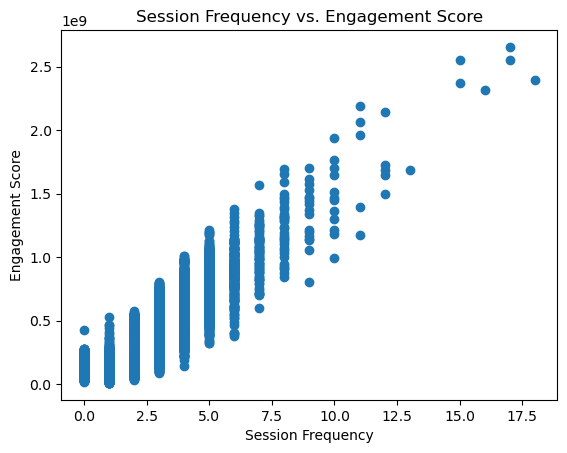

In [36]:
# Visualize the data (you can customize the plots based on your needs)
plt.scatter(engagement_mydata['session_frequency'], engagement_mydata['engagement_score'])
plt.xlabel('Session Frequency')
plt.ylabel('Engagement Score')
plt.title('Session Frequency vs. Engagement Score')
plt.show()

In [37]:
# Report the top 10 customers for each engagement metric
top_10_session_frequency = engagement_df.nlargest(10, 'session_frequency')
top_10_average_session_duration = engagement_df.nlargest(10, 'average_session_duration')
top_10_total_data_usage = engagement_df.nlargest(10, 'total_data_usage')
top_10_engagement_score = engagement_df.nlargest(10, 'engagement_score')

In [38]:
# Display the results
print("Top 10 Customers by Session Frequency:")
print(top_10_session_frequency)

print("\nTop 10 Customers by Average Session Duration:")
print(top_10_average_session_duration)

print("\nTop 10 Customers by Total Data Usage:")
print(top_10_total_data_usage)

print("\nTop 10 Customers by Engagement Score:")
print(top_10_engagement_score)

Top 10 Customers by Session Frequency:
       MSISDN/Number  session_frequency  average_session_duration  \
13526   3.362632e+10                 18              4.884600e+05   
6437    3.361489e+10                 17              5.863059e+05   
13180   3.362578e+10                 17              1.091396e+06   
37052   3.365973e+10                 16              2.522025e+05   
76363   3.367588e+10                 15              3.243760e+05   
92923   3.376054e+10                 15              6.186440e+05   
65118   3.366716e+10                 13              6.726600e+05   
666     3.360313e+10                 12              5.240000e+05   
1279    3.360452e+10                 12              4.340050e+05   
13994   3.362708e+10                 12              3.919550e+05   

       total_data_usage  engagement_score  
13526      7.971167e+09      2.391546e+09  
6437       8.846226e+09      2.654102e+09  
13180      8.499621e+09      2.550323e+09  
37052      7.705863e+09  

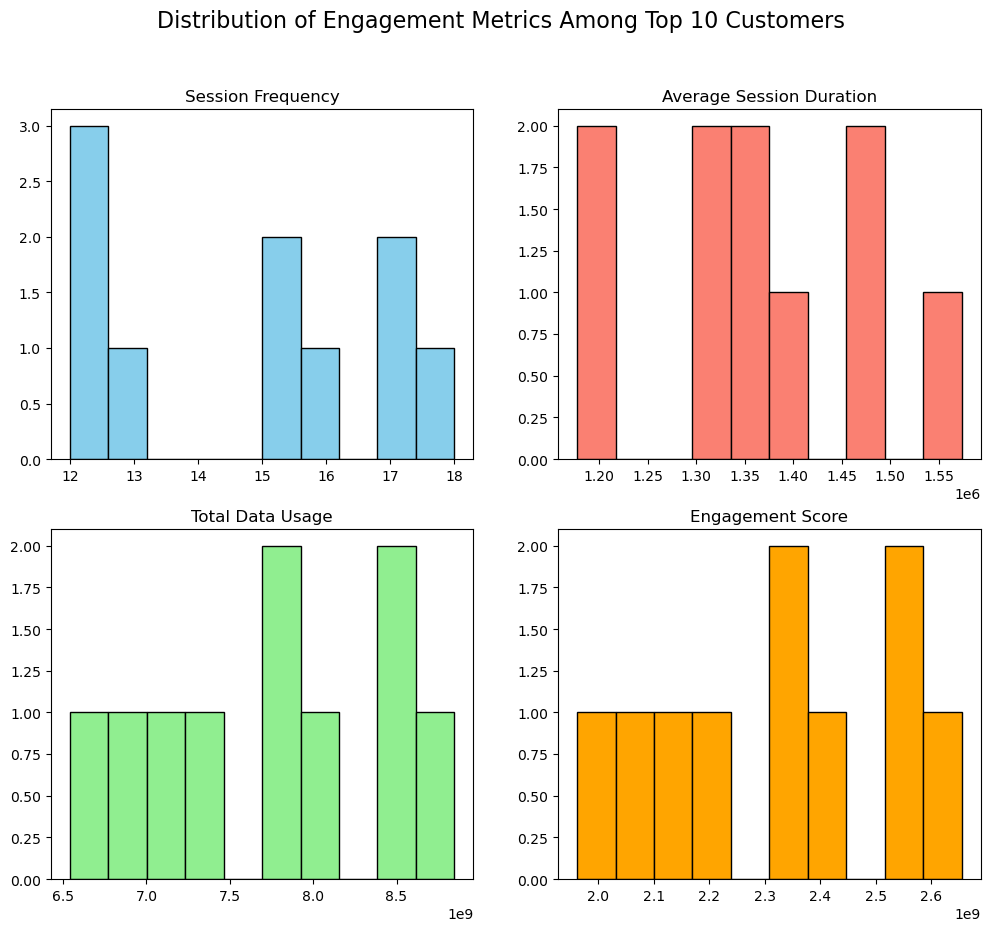

In [50]:
import matplotlib.pyplot as plt

# Plot histograms for each engagement metric
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribution of Engagement Metrics Among Top 10 Customers', fontsize=16)

# Session Frequency
axs[0, 0].hist(top_10_session_frequency['session_frequency'], bins=10, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Session Frequency')

# Average Session Duration
axs[0, 1].hist(top_10_average_session_duration['average_session_duration'], bins=10, color='salmon', edgecolor='black')
axs[0, 1].set_title('Average Session Duration')

# Total Data Usage
axs[1, 0].hist(top_10_total_data_usage['total_data_usage'], bins=10, color='lightgreen', edgecolor='black')
axs[1, 0].set_title('Total Data Usage')

# Engagement Score
axs[1, 1].hist(top_10_engagement_score['engagement_score'], bins=10, color='orange', edgecolor='black')
axs[1, 1].set_title('Engagement Score')

plt.show()


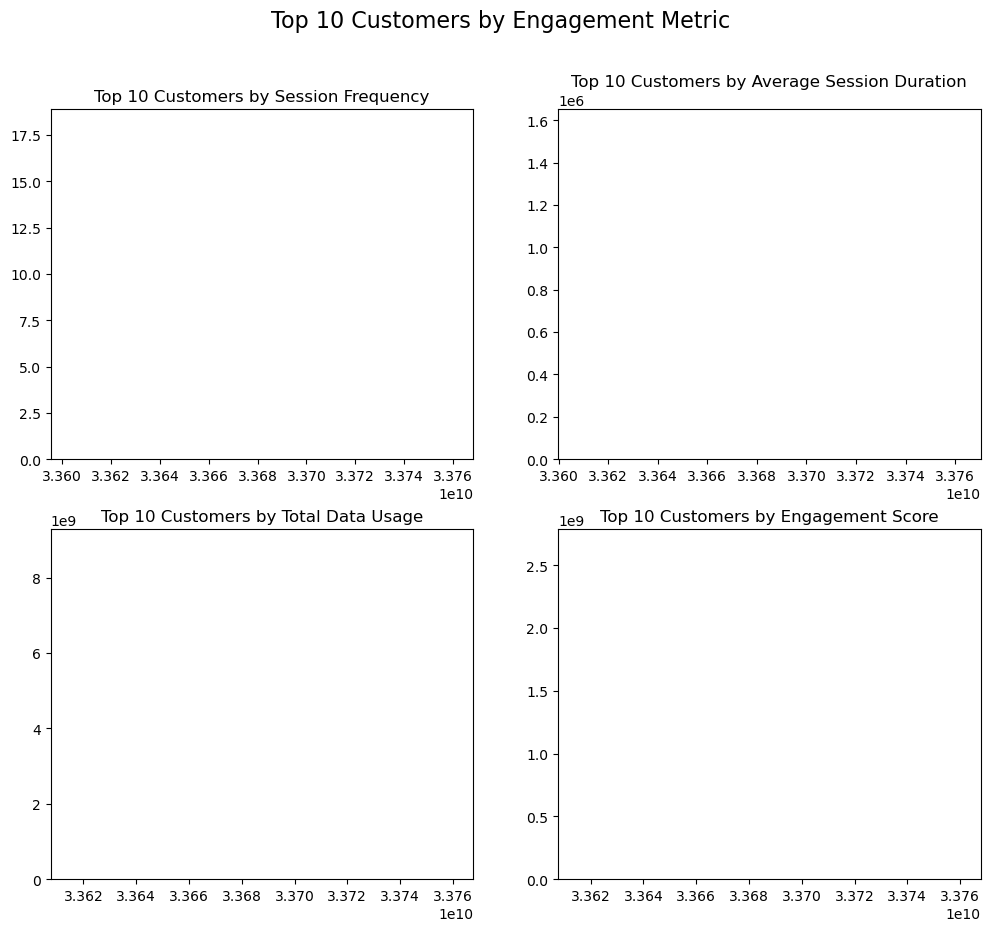

In [51]:
# Plot bar plots for the top 10 customers for each engagement metric
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Top 10 Customers by Engagement Metric', fontsize=16)

# Session Frequency
axs[0, 0].bar(top_10_session_frequency['MSISDN/Number'], top_10_session_frequency['session_frequency'], color='skyblue')
axs[0, 0].set_title('Top 10 Customers by Session Frequency')

# Average Session Duration
axs[0, 1].bar(top_10_average_session_duration['MSISDN/Number'], top_10_average_session_duration['average_session_duration'], color='salmon')
axs[0, 1].set_title('Top 10 Customers by Average Session Duration')

# Total Data Usage
axs[1, 0].bar(top_10_total_data_usage['MSISDN/Number'], top_10_total_data_usage['total_data_usage'], color='lightgreen')
axs[1, 0].set_title('Top 10 Customers by Total Data Usage')

# Engagement Score
axs[1, 1].bar(top_10_engagement_score['MSISDN/Number'], top_10_engagement_score['engagement_score'], color='orange')
axs[1, 1].set_title('Top 10 Customers by Engagement Score')

plt.show()


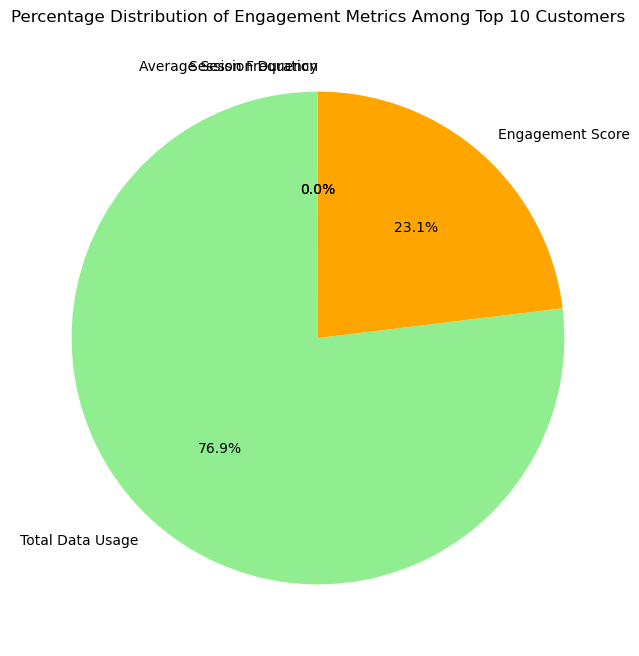

In [52]:
# Calculate total values for each engagement metric
total_session_frequency = top_10_session_frequency['session_frequency'].sum()
total_average_session_duration = top_10_average_session_duration['average_session_duration'].sum()
total_total_data_usage = top_10_total_data_usage['total_data_usage'].sum()
total_engagement_score = top_10_engagement_score['engagement_score'].sum()

# Data for the pie chart
data = [total_session_frequency, total_average_session_duration, total_total_data_usage, total_engagement_score]

# Define labels for each engagement metric
labels = ['Session Frequency', 'Average Session Duration', 'Total Data Usage', 'Engagement Score']

# Define colors for the pie chart
colors = ['skyblue', 'salmon', 'lightgreen', 'orange']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Percentage Distribution of Engagement Metrics Among Top 10 Customers')
plt.show()


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming 'engagement_mydata' is your DataFrame with engagement metrics
numeric_columns = ['session_frequency', 'average_session_duration', 'total_data_usage', 'engagement_score']
engagement_metrics_subset = engagement_mydata[numeric_columns]

# Standardize the features
scaler = StandardScaler()
engagement_metrics_normalized = scaler.fit_transform(engagement_metrics_subset)

# Perform k-means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_mydata['cluster'] = kmeans.fit_predict(engagement_metrics_normalized)

# Display the cluster assignment for each customer
print(engagement_mydata[['MSISDN/Number', 'cluster']])


/home/habte/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


        MSISDN/Number  cluster
0        3.360100e+10        2
1        3.360100e+10        1
2        3.360100e+10        1
3        3.360101e+10        2
4        3.360101e+10        0
...               ...      ...
106851   3.379000e+10        2
106852   3.379000e+10        1
106853   3.197021e+12        1
106854   3.370000e+14        1
106855   8.823971e+14        1

[106856 rows x 2 columns]


In [11]:
cluster_means = engagement_mydata.groupby('cluster').mean()
print(cluster_means)

         MSISDN/Number  session_frequency  average_session_duration  \
cluster                                                               
0         3.367541e+10           2.832615             102469.975054   
1         8.155929e+10           1.138935             190784.693302   
2         3.367367e+10           1.152119              68680.326749   

         total_data_usage  engagement_score  
cluster                                      
0            1.578853e+09      61483.118078  
1            5.469639e+08     114471.271555  
2            5.407044e+08      41208.656897  


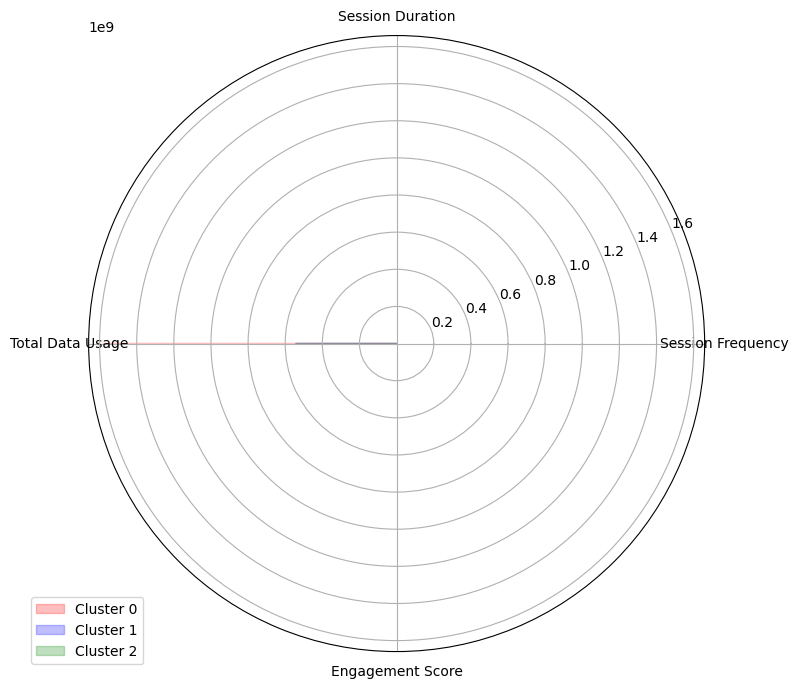

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Data for radar chart
labels = ['Session Frequency', 'Session Duration', 'Total Data Usage', 'Engagement Score']

# Mean values for each cluster
cluster_0_values = [2.83, 102470, 1.58e9, 61483]
cluster_1_values = [1.14, 190785, 5.47e8, 114471]
cluster_2_values = [1.15, 68680, 5.41e8, 41208]

# Number of metrics
num_metrics = len(labels)

# Calculate angle for each axis
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

# Close the plot
values = cluster_0_values + cluster_0_values[:1]
angles += angles[:1]

# Create a radar chart for each cluster
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='r', alpha=0.25, label='Cluster 0')

# Repeat for Cluster 1
values = cluster_1_values + cluster_1_values[:1]
ax.fill(angles, values, color='b', alpha=0.25, label='Cluster 1')

# Repeat for Cluster 2
values = cluster_2_values + cluster_2_values[:1]
ax.fill(angles, values, color='g', alpha=0.25, label='Cluster 2')

# Label each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Display the legend
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()


In [25]:
numeric_columns = ['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)', 'session_duration']